<a href="https://colab.research.google.com/github/PiyushiAnand/FinSearch_RL/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Step 1: Data Preprocessing
train_data = pd.read_excel('HistoricalPrices-3.xlsx')
test_data = pd.read_excel('nifty50.xlsx')

def preprocess_data(data):
    closing_prices = data['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(closing_prices)
    return scaled_data, scaler

# Preprocess training data
train_data, scaler_train = preprocess_data(train_data)

# Preprocess testing data (using the same scaler from training data)
test_data, _ = preprocess_data(test_data)



In [ ]:
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

# Define the time steps for LSTM
time_steps = 60

# Create training and testing datasets for LSTM
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
71/71 [==============================] - 11s 73ms/step - loss: 0.0156
Epoch 2/50
71/71 [==============================] - 4s 58ms/step - loss: 6.0502e-04
Epoch 3/50
71/71 [==============================] - 5s 68ms/step - loss: 6.1462e-04
Epoch 4/50
71/71 [==============================] - 5s 65ms/step - loss: 5.6017e-04
Epoch 5/50
71/71 [==============================] - 4s 60ms/step - loss: 5.5164e-04
Epoch 6/50
71/71 [==============================] - 5s 75ms/step - loss: 5.3170e-04
Epoch 7/50
71/71 [==============================] - 4s 57ms/step - loss: 4.8996e-04
Epoch 8/50
71/71 [==============================] - 4s 60ms/step - loss: 4.9211e-04
Epoch 9/50
71/71 [==============================] - 5s 74ms/step - loss: 4.6232e-04
Epoch 10/50
71/71 [==============================] - 4s 60ms/step - loss: 4.3713e-04
Epoch 11/50
71/71 [==============================] - 4s 58ms/step - loss: 4.2906e-04
Epoch 12/50
71/71 [==============================] - 5s 78ms/step - loss: 4.0

In [ ]:
predictions = model.predict(X_test)
predicted_prices = scaler_train.inverse_transform(predictions)

6/6 [==============================] - 1s 18ms/step


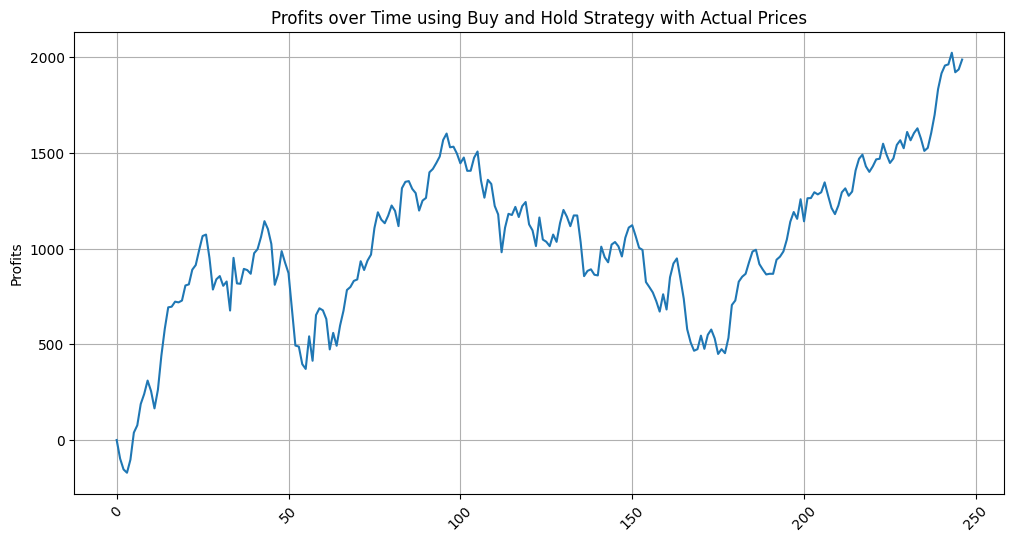

In [ ]:
# Calculate the initial investment amount
initial_investment = 10000
# Load the testing dataset with actual prices
test_data_actual = pd.read_excel('nifty50.xlsx')
closing_prices_actual = test_data_actual['Close'].values

# Calculate the number of units of the asset bought
num_units_bought = initial_investment / closing_prices_actual[0]

# Calculate the value of the investment over time based on the buy and hold strategy using actual prices
investment_value = num_units_bought * closing_prices_actual

# Calculate the profit or loss over time
profits = investment_value - initial_investment

# Plot the profits over time
plt.figure(figsize=(12, 6))
plt.plot(profits)
plt.ylabel('Profits')
plt.title('Profits over Time using Buy and Hold Strategy with Actual Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
